In [1]:
import pandas as pd
from pandas import Series, DataFrame
import numpy as np
import plotly.tools as tls
import plotly.plotly as py
import cufflinks as cf
# print(cf.__version__)
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score
from math import sqrt
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

%matplotlib inline


In [2]:
import seaborn as sns

In [3]:
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import plotly.graph_objs as go

In [4]:
tls.set_credentials_file(username='NaomiMachado',api_key='4BHQNShvzY23VXSO41qj')

In [5]:
BlackFridayTrain = pd.read_csv('train.csv')

In [6]:
BlackFridayTrain['Product_Category_2'].fillna(0, inplace=True)
BlackFridayTrain['Product_Category_3'].fillna(0, inplace=True)

In [7]:
BlackFridayTrain['Product_Category_2'] = BlackFridayTrain['Product_Category_2'].astype(int)
BlackFridayTrain['Product_Category_3'] = BlackFridayTrain['Product_Category_3'].astype(int)

In [8]:
BlackFridayTrain.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 12 columns):
User_ID                       550068 non-null int64
Product_ID                    550068 non-null object
Gender                        550068 non-null object
Age                           550068 non-null object
Occupation                    550068 non-null int64
City_Category                 550068 non-null object
Stay_In_Current_City_Years    550068 non-null object
Marital_Status                550068 non-null int64
Product_Category_1            550068 non-null int64
Product_Category_2            550068 non-null int32
Product_Category_3            550068 non-null int32
Purchase                      550068 non-null int64
dtypes: int32(2), int64(5), object(5)
memory usage: 46.2+ MB


# Data Analysis

In [9]:
BlackFridayTrain.groupby('Gender').size().iplot(kind='bar', title='Gender Distribution', color='red')

In [10]:
BlackFridayTrain.groupby('Age').size().iplot(kind='bar', title='Age Distribution')

In [11]:
BlackFridayTrain.groupby('Occupation').size().iplot(kind='bar', title='Occupation Distribution', color='green')

In [12]:
BlackFridayTrain.groupby('City_Category').size().iplot(kind='bar', title='City Category Distribution', color='blue')

In [13]:
BlackFridayTrain.groupby('Stay_In_Current_City_Years').size().iplot(kind='bar', title='Stay In Current City Years Distribution', color='purple')

In [17]:
BlackFridayTrain.groupby('Marital_Status').size().iplot(kind='bar', title='Marital Status Distribution', color='navy')

# Purchase Amounts based on Data Attributes

In [18]:
BlackFridayTrain.groupby(['Gender'])['Purchase'].sum().iplot(kind='bar', title="Gender Distribution of the data", color='red')

In [19]:
BlackFridayTrain.groupby(['Age'])['Purchase'].sum().iplot(kind='bar', title="Age Distribution of the data")

In [20]:
BlackFridayTrain.groupby(['Occupation'])['Purchase'].sum().iplot(kind='bar', title="Occupation Distribution of the data", color='green')

In [21]:
BlackFridayTrain.groupby('City_Category')['Purchase'].sum().iplot(kind='bar', title="City Category Distribution of the data", color='blue')

In [22]:
BlackFridayTrain.groupby('Stay_In_Current_City_Years')['Purchase'].sum().iplot(kind='bar', title="Stay Duration Distribution of the data", color='purple')

In [23]:
BlackFridayTrain.groupby('Marital_Status')['Purchase'].sum().iplot(kind='bar', title="Marital Status Distribution of the data", color='navy')

In [24]:
ageVsGender = BlackFridayTrain.groupby(['Age', 'Gender'])['Purchase'].sum()

In [25]:
ageVsGender

Age    Gender
0-17   F           42385978
       M           92527205
18-25  F          205475842
       M          708372833
26-35  F          442976233
       M         1588794345
36-45  F          243438963
       M          783130921
46-50  F          116706864
       M          304136539
51-55  F           89465997
       M          277633647
55+    F           45782765
       M          154984610
Name: Purchase, dtype: int64

In [26]:
males = go.Bar(
    x=['0-17', '18-25', '26-35', '36-45','46-55', '55+'],
    y=[92527205, 708372833, 1588794345, 783130921, 304136539, 277633647, 154984610],
    name='Male-AgeGroup Purchases',
    marker=dict(
        color='rgb(158,202,225)',
        line=dict(
            color='rgb(8,48,107)',
            width=1.5,
        )
    ),
    opacity=0.8
)

In [27]:
females = go.Bar(
    x=['0-17', '18-25', '26-35', '36-45','46-55', '55+'],
    y=[42385978, 205475842, 442976233, 243438963, 116706864, 89465997, 45782765],
    name='Female-AgeGroup Purchases',
    marker=dict(
        color='rgb(255, 153, 153)',
        line=dict(
            color='rgb(132, 46, 46)',
            width=1.5,
        )
    ),
    opacity=0.8
)

In [28]:
data = [males, females]
layout = go.Layout(
    barmode='grouped'
)

In [29]:
fig = go.Figure(data=data, layout=layout)
py.iplot(fig)

In [166]:
BlackFridayTrainNew = BlackFridayTrain.copy(deep=True)

BlackFridayTrainNew.loc[BlackFridayTrainNew['Gender'] == 'F', 'Gender'] = 0
BlackFridayTrainNew.loc[BlackFridayTrainNew['Gender'] == 'M', 'Gender'] = 1

BlackFridayTrainNew.loc[BlackFridayTrainNew['Age'] == '0-17', 'Age'] = 0
BlackFridayTrainNew.loc[BlackFridayTrainNew['Age'] == '18-25', 'Age'] = 1
BlackFridayTrainNew.loc[BlackFridayTrainNew['Age'] == '26-35', 'Age'] = 2
BlackFridayTrainNew.loc[BlackFridayTrainNew['Age'] == '36-45', 'Age'] = 3
BlackFridayTrainNew.loc[BlackFridayTrainNew['Age'] == '46-50', 'Age'] = 4
BlackFridayTrainNew.loc[BlackFridayTrainNew['Age'] == '51-55', 'Age'] = 5
BlackFridayTrainNew.loc[BlackFridayTrainNew['Age'] == '55+', 'Age'] = 6

BlackFridayTrainNew.loc[BlackFridayTrainNew['Stay_In_Current_City_Years'] == '4+', 'Stay_In_Current_City_Years'] = 4

BlackFridayTrainNew.loc[BlackFridayTrainNew['City_Category'] == 'A', 'City_Category'] = 0
BlackFridayTrainNew.loc[BlackFridayTrainNew['City_Category'] == 'B', 'City_Category'] = 1
BlackFridayTrainNew.loc[BlackFridayTrainNew['City_Category'] == 'C', 'City_Category'] = 2


BlackFridayTrainNew['Gender'] = BlackFridayTrainNew['Gender'].astype(int)
BlackFridayTrainNew['Age'] = BlackFridayTrainNew['Age'].astype(int)
BlackFridayTrainNew['City_Category'] = BlackFridayTrainNew['City_Category'].astype(int)
BlackFridayTrainNew['Stay_In_Current_City_Years'] = BlackFridayTrainNew['Stay_In_Current_City_Years'].astype(int)

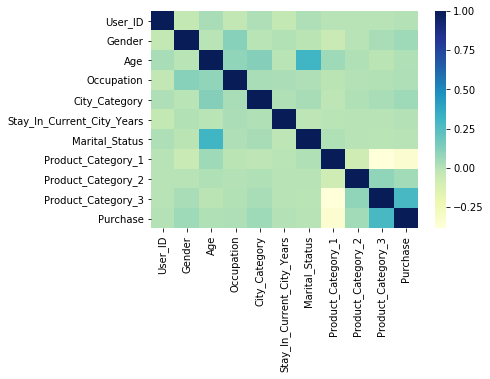

In [176]:
sns.heatmap(data=BlackFridayTrainNew.corr(), cmap="YlGnBu")

In [194]:
conditions = [
    (BlackFridayTrainNew['Product_Category_1'] != 0) & (BlackFridayTrainNew['Product_Category_2'] == 0) & (BlackFridayTrainNew['Product_Category_3'] == 0),
    (BlackFridayTrainNew['Product_Category_1'] != 0) & (BlackFridayTrainNew['Product_Category_2'] != 0) & (BlackFridayTrainNew['Product_Category_3'] == 0),
    (BlackFridayTrainNew['Product_Category_1'] != 0) & (BlackFridayTrainNew['Product_Category_2'] != 0) & (BlackFridayTrainNew['Product_Category_3'] != 0)]
choices = [1, 2, 3]
BlackFridayTrainNew['Category_Count'] = np.select(conditions, choices, default=0)

In [195]:
BlackFridayTrainNew['Product_Score'] = 0.0
required_product_data = BlackFridayTrainNew[['Product_ID', 'Product_Score']]

required_product_data['Frequency'] = 1

grouped_product_data = required_product_data.groupby(['Product_ID']).sum()
grouped_product_data = grouped_product_data.reset_index()

grouped_product_data.head()

C:\Users\naomi\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



,Product_ID,Product_Score,Frequency
0,P00000142,0.0,1152
1,P00000242,0.0,376
2,P00000342,0.0,244
3,P00000442,0.0,92
4,P00000542,0.0,149


In [196]:
max_frequency = grouped_product_data['Frequency'].max()

final_product_data = grouped_product_data[['Product_ID', 'Product_Score', 'Frequency']]

for index, row in final_product_data.iterrows():
    product_score = (float(row['Frequency']) / float(max_frequency))
    final_product_data.set_value(index, 'Product_Score', product_score)

C:\Users\naomi\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: FutureWarning:

set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead



In [197]:
final_product_data.head()

,Product_ID,Product_Score,Frequency
0,P00000142,0.612766,1152
1,P00000242,0.200000,376
2,P00000342,0.129787,244
3,P00000442,0.048936,92
4,P00000542,0.079255,149


In [198]:
BlackFridayTrainNew.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,Category_Count,Product_Score
0,1000001,P00069042,0,0,10,0,2,0,3,0,0,8370,1,0.0
1,1000001,P00248942,0,0,10,0,2,0,1,6,14,15200,3,0.0
2,1000001,P00087842,0,0,10,0,2,0,12,0,0,1422,1,0.0
3,1000001,P00085442,0,0,10,0,2,0,12,14,0,1057,2,0.0
4,1000002,P00285442,1,6,16,2,4,0,8,0,0,7969,1,0.0


In [199]:
for index, row in BlackFridayTrainNew.iterrows():
    p_score = final_product_data.loc[final_product_data.Product_ID == row['Product_ID'], 'Product_Score'].values[0]
    BlackFridayTrainNew.set_value(index, 'Product_Score', p_score)

C:\Users\naomi\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: FutureWarning:

set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead



In [200]:
BlackFridayTrainNew['User_Score'] = 0.0
required_user_data = BlackFridayTrainNew[['User_ID', 'User_Score']]

required_user_data['Frequency'] = 1

grouped_user_data = required_user_data.groupby(['User_ID']).sum()
grouped_user_data = grouped_user_data.reset_index()

grouped_user_data.head()

C:\Users\naomi\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



,User_ID,User_Score,Frequency
0,1000001,0.0,35
1,1000002,0.0,77
2,1000003,0.0,29
3,1000004,0.0,14
4,1000005,0.0,106


In [201]:
max_frequency = grouped_user_data['Frequency'].max()

final_user_data = grouped_user_data[['User_ID', 'User_Score', 'Frequency']]

for index, row in final_user_data.iterrows():
    product_score = (float(row['Frequency']) / float(max_frequency))
    final_user_data.set_value(index, 'User_Score', product_score)

C:\Users\naomi\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: FutureWarning:

set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead



In [202]:
for index, row in BlackFridayTrainNew.iterrows():
    p_score = final_user_data.loc[final_user_data.User_ID == row['User_ID'], 'User_Score'].values[0]
    BlackFridayTrainNew.set_value(index, 'User_Score', p_score)

C:\Users\naomi\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: FutureWarning:

set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead



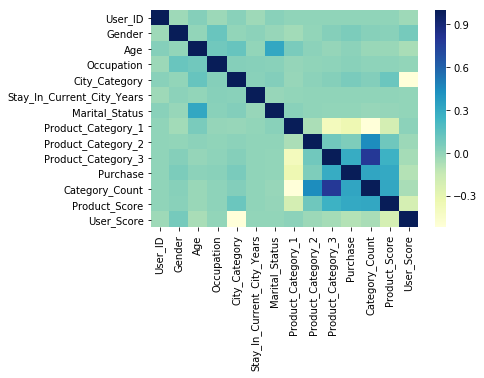

In [203]:
sns.heatmap(data=BlackFridayTrainNew.corr(), cmap="YlGnBu")

In [33]:
ageVsGenderVsOccupation = BlackFridayTrain.groupby(['Age', 'Gender', 'Occupation'])['Purchase'].sum()

In [34]:
ageVsGenderVsOccupation

Age    Gender  Occupation
0-17   F       0               6809592
               1               1727045
               2                710493
               7                375392
               10             32111554
               19               651902
       M       0              13047669
               1               1659688
               2                501457
               4               1065812
               7               1085469
               8                304090
               10             64980645
               11               136343
               12              1918711
               13               134553
               14              1081064
               17               364036
               19              6247668
18-25  F       0              19154353
               1              13083635
               2              14832435
               3               6260312
               4             101784192
               5                702840